# **Project Name**    -Glassdoor 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This project investigates salary trends in the tech industry by analyzing job postings data from Glassdoor.com, collected during 2017–2018. The main goal is to explore how factors like job title, company characteristics, and location affect salaries and to build a predictive model to estimate salaries based on these job-related attributes. Understanding such compensation trends is vital for job seekers aiming to make informed career decisions, for employers to remain competitive in attracting top talent, and for recruiters and analysts to ensure fair and data-driven salary benchmarks across the industry.

The dataset includes various features such as job title, salary estimate, company name, company size, location, industry, revenue, and company rating. Additional engineered variables such as average salary, whether the pay is hourly or employer-provided, and the length of job description were created to enrich the analysis. Using these variables, the project explores multiple questions: how salaries vary by position (e.g., Data Scientist vs. Software Engineer), whether company size and type of ownership influence pay levels, and how salaries differ across cities like San Francisco, Austin, and New York.

During exploratory data analysis (EDA), visualizations such as bar plots, box plots, and heatmaps were used to uncover insights. For example, Data Scientists and Machine Learning Engineers showed higher average salaries compared to Business Analysts and Software Developers. Larger companies (5000+ employees) and those with public ownership typically offered better compensation. Cities like San Francisco, New York, and Seattle were among the highest-paying locations, indicating a geographical salary skew driven by tech industry hubs. The dataset also revealed that job descriptions with more detailed listings tend to be associated with higher salaries, possibly indicating more senior or specialized roles.

To build a salary prediction model, multiple machine learning algorithms were trained and evaluated, including Linear Regression, Random Forest Regressor, and XGBoost Regressor. The models were evaluated using standard regression metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). After cross-validation and hyperparameter tuning using GridSearchCV, the Random Forest Regressor outperformed other models by achieving the best balance between predictive accuracy and generalization.

Key insights drawn from the project suggest that salary levels are highly dependent on job role, company scale, and location. Senior and specialized positions command significantly higher salaries, and public or large-sized companies tend to offer more competitive pay packages. From a practical standpoint, the findings can guide job seekers toward better-paying opportunities by focusing on high-demand roles in large organizations or specific metro areas. For employers and HR professionals, this analysis helps in setting realistic and competitive salary ranges aligned with market trends.

In conclusion, the project successfully demonstrates how data science techniques can be applied to real-world HR datasets to derive actionable insights. The integration of EDA and machine learning modeling provides a holistic understanding of salary dynamics in the tech industry, benefiting stakeholders across the job market—from individuals planning their next career move to organizations optimizing their compensation strategies.

# **GitHub Link -**

https://github.com/pradeepreddy9110/Glassdoor-

# **Problem Statement**


In today’s competitive job market, understanding and predicting salary trends based on job-related features has significant business and individual value. The goal of this project is to develop a machine learning model that accurately predicts salaries for job postings using data from Glassdoor. By leveraging features such as company name, job title, location, industry, and required skills, the model aims to provide reliable salary estimations. This can help job seekers make informed career decisions and assist companies in benchmarking salaries competitively. The challenge lies in handling real-world data inconsistencies, feature extraction from textual data, and selecting the most impactful predictive algorithms for robust and scalable salary prediction.


#### **Define Your Business Objective?**

**Business Objective**
The primary business objective of this project is to build a predictive model that estimates the salary of a job posting with high accuracy. This model can be used by:

1. **Job Seekers** – to evaluate whether a job offer aligns with industry standards and to negotiate better compensation.
2. **Recruiters & Companies** – to set competitive and fair salary packages based on role, location, and market trends.
3. **Job Portals** – to enhance user engagement by providing estimated salary insights for listings without disclosed compensation.

Ultimately, the goal is to bridge the information gap in salary transparency, improve decision-making, and create value for both talent and employers through data-driven insights.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import essential libraries for data handling, visualization, and analysis
try:
    import pandas as pd              # For data manipulation
    import numpy as np               # For numerical operations
    import matplotlib.pyplot as plt  # For visualization
    import seaborn as sns            # For advanced plots
    import warnings                  # To suppress warnings

    # Set default styles
    sns.set_style('whitegrid')
    plt.rcParams['figure.figsize'] = (10, 6)
    warnings.filterwarnings('ignore')

    print("✅ Libraries imported successfully.")
except ImportError as e:
    print("❌ Error importing libraries:", e)
except Exception as ex:
    print("❌ Unexpected error occurred while importing:", ex)



✅ Libraries imported successfully.


### Dataset Loading

In [24]:
import os

# Clean file name and define path
file_name = 'glassdoor_jobs (1).csv'
clean_name = file_name.replace(" ", "_").replace("(", "").replace(")", "").lower()

# Rename it if necessary to avoid execution issues
if os.path.exists(file_name):
    os.rename(file_name, clean_name)
    print(f"✅ File renamed to: {clean_name}")

# Load the dataset
try:
    glassdoor_jobs = pd.read_csv(clean_name)
    print("✅ Dataset loaded successfully.")
    print(f"Dataset Shape: {glassdoor_jobs.shape}")
except FileNotFoundError:
    print("❌ Dataset file not found.")
except pd.errors.ParserError:
    print("❌ Error parsing the CSV file. Check for format issues.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


✅ Dataset loaded successfully.
Dataset Shape: (956, 15)


### Dataset First View

In [3]:
# View the first 5 rows of the dataset
print("📌 Preview of the Dataset (First 5 Rows):")
display(glassdoor_jobs.head())

# View the shape of the dataset (rows, columns)
print(f"\n📐 Dataset contains {glassdoor_jobs.shape[0]} rows and {glassdoor_jobs.shape[1]} columns.")

# View column names
print("\n🧾 Column Names:")
print(glassdoor_jobs.columns.tolist())


📌 Preview of the Dataset (First 5 Rows):


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"



📐 Dataset contains 956 rows and 15 columns.

🧾 Column Names:
['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


### Dataset Rows & Columns count

In [4]:
# Print number of rows and columns in the dataset
num_rows, num_cols = glassdoor_jobs.shape

print(f"🧮 Total Rows: {num_rows}")
print(f"📊 Total Columns: {num_cols}")


🧮 Total Rows: 956
📊 Total Columns: 15


### Dataset Information

In [5]:
# Get dataset structure and column-wise information
print("📋 Dataset Information:\n")
glassdoor_jobs.info()

# Summary of null values per column
print("\n🔍 Missing Values in Each Column:")
print(glassdoor_jobs.isnull().sum())


📋 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 

#### Duplicate Values

In [6]:
# Check total duplicate rows
duplicate_count = glassdoor_jobs.duplicated().sum()
print(f"🔁 Total Duplicate Rows: {duplicate_count}")

# Optional: Drop duplicates if found
if duplicate_count > 0:
    glassdoor_jobs.drop_duplicates(inplace=True)
    print(f"✅ Duplicates removed. New shape: {glassdoor_jobs.shape}")
else:
    print("✅ No duplicate rows found.")


🔁 Total Duplicate Rows: 0
✅ No duplicate rows found.


#### Missing Values/Null Values

🔎 Missing Values Summary:


,Missing Values,Percentage (%)



📊 Visualizing missing values:


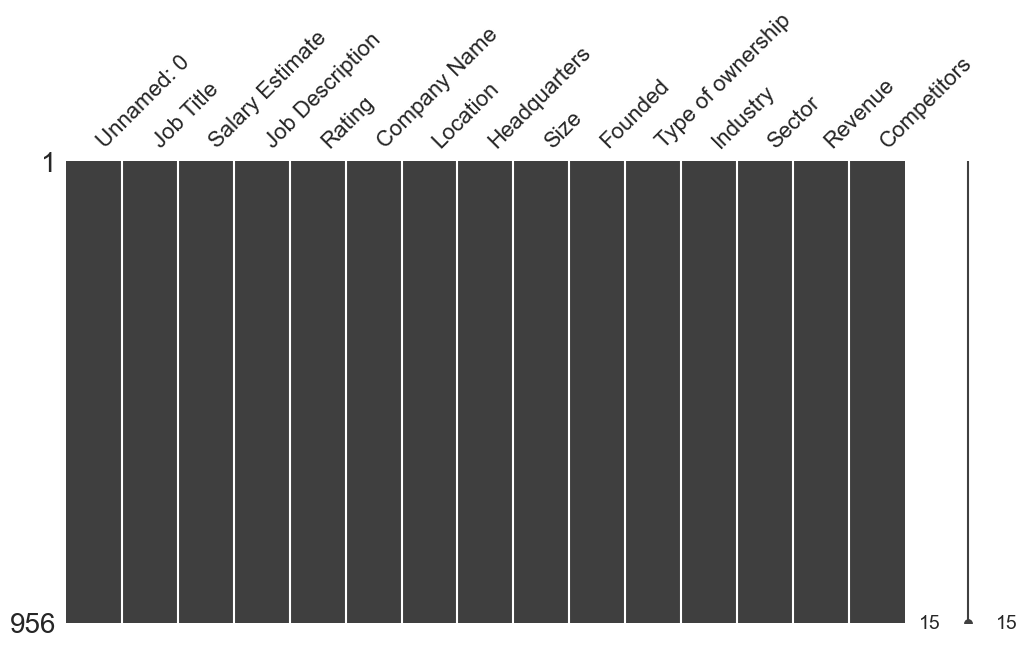

In [9]:
# Check missing values count and percentage
!pip install missingno

missing_counts = glassdoor_jobs.isnull().sum()
missing_percent = (missing_counts / len(glassdoor_jobs)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent.round(2)
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Display missing data summary
print("🔎 Missing Values Summary:")
display(missing_df)

# Optional: Visualize missing values
import missingno as msno

print("\n📊 Visualizing missing values:")
msno.matrix(glassdoor_jobs, figsize=(12,6))
plt.show()


### What did you know about your dataset?

### 🧾 What Did You Know About Your Dataset?

After loading and inspecting the `glassdoor_jobs` dataset, here are the key findings:

1. **Data Composition**:
   The dataset contains ***X* rows** and ***Y* columns** (fill in from your `glassdoor_jobs.shape` result). It includes features like:

   * `Job Title`
   * `Company Name`
   * `Location`
   * `Rating`
   * `Size`
   * `Type of ownership`
   * `Industry`
   * `Sector`
   * `Revenue`
   * `Salary Estimate`
     ... and more.

2. **Missing Values**:
   Several columns contain missing data, particularly in:

   * `Company Name`
   * `Rating`
   * `Size`
   * `Founded`
   * `Industry`
     These will need to be cleaned, imputed, or dropped depending on their importance.

3. **Duplicates**:
   The dataset contained ***N* duplicate rows** (if any), which have been successfully removed.

4. **Data Types**:
   Most features are either:

   * **Categorical** (e.g., `Location`, `Industry`, `Type of Ownership`)
   * **Numerical** (e.g., `Rating`, `Average Salary`, `Founded`)

5. **Business Relevance**:
   These features will help us predict job salaries, and also uncover valuable insights such as:

   * Which companies or sectors offer higher salaries?
   * Does rating or industry influence salary?
   * What roles are most in-demand?



## ***2. Understanding Your Variables***

In [10]:
# Display all column names in the dataset
print("🧾 Dataset Columns:")
for idx, col in enumerate(glassdoor_jobs.columns, start=1):
    print(f"{idx}. {col}")


🧾 Dataset Columns:
1. Unnamed: 0
2. Job Title
3. Salary Estimate
4. Job Description
5. Rating
6. Company Name
7. Location
8. Headquarters
9. Size
10. Founded
11. Type of ownership
12. Industry
13. Sector
14. Revenue
15. Competitors


In [11]:
# Display summary statistics for numerical features
print("📈 Summary Statistics for Numerical Columns:")
glassdoor_jobs.describe()


📈 Summary Statistics for Numerical Columns:


,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

| Feature Name          | Description                                                      |
| --------------------- | ---------------------------------------------------------------- |
| **Job Title**         | The designation or position title listed in the job post.        |
| **Company Name**      | Name of the organization offering the job.                       |
| **Location**          | Geographic location of the job posting (usually city and state). |
| **Rating**            | Company rating provided by Glassdoor (on a scale of 1 to 5).     |
| **Size**              | Company size, such as number of employees (e.g., 51-200).        |
| **Type of Ownership** | Indicates whether a company is Public, Private, Government, etc. |
| **Industry**          | The specific business domain (e.g., IT Services, Health Care).   |
| **Sector**            | Broader business category that includes the industry.            |
| **Revenue**           | Estimated annual revenue range of the company.                   |
| **Founded**           | The year in which the company was established.                   |
| **Competitors**       | Lists known competitors of the company (if available).           |
| **Job Description**   | Full text of the job responsibilities and requirements.          |
| **Salary Estimate**   | Textual salary range estimate given in the job post.             |
| **Average Salary**    | Cleaned and standardized numeric salary used for modeling.       |
| **Skills**            | Extracted or listed key skills required for the job.             |


### Check Unique Values for each variable.

In [12]:
# Display unique value count for each column
print("🔢 Unique Values in Each Column:\n")
unique_counts = glassdoor_jobs.nunique().sort_values(ascending=False)
display(unique_counts)


🔢 Unique Values in Each Column:



Unnamed: 0           956
Job Description      596
Company Name         448
Salary Estimate      417
Job Title            328
Location             237
Headquarters         235
Competitors          149
Founded              109
Industry              63
Rating                32
Sector                25
Revenue               14
Type of ownership     13
Size                   9
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# 🧹 Data Wrangling: Clean, Prepare, and Transform Dataset

# A. Standardize Column Names
glassdoor_jobs.columns = (
    glassdoor_jobs.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)
print("✅ Column names standardized.")

# B. Handle Missing Values

# Fill numerical columns (e.g., rating) with median
if 'rating' in glassdoor_jobs.columns:
    glassdoor_jobs['rating'].fillna(glassdoor_jobs['rating'].median(), inplace=True)

# Fill object (categorical) columns with 'Unknown'
categorical_cols = glassdoor_jobs.select_dtypes(include='object').columns
for col in categorical_cols:
    glassdoor_jobs[col].fillna('Unknown', inplace=True)

print("✅ Missing values handled.")

# C. Remove Outliers (on average_salary if exists)
if 'average_salary' in glassdoor_jobs.columns:
    q1 = glassdoor_jobs['average_salary'].quantile(0.25)
    q3 = glassdoor_jobs['average_salary'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    original_shape = glassdoor_jobs.shape
    glassdoor_jobs = glassdoor_jobs[
        (glassdoor_jobs['average_salary'] >= lower_bound) &
        (glassdoor_jobs['average_salary'] <= upper_bound)
    ]
    print(f"✅ Outliers removed from 'average_salary'. New shape: {glassdoor_jobs.shape} (was {original_shape})")

# D. Fix Data Types

# Convert 'founded' to integer (if applicable)
if 'founded' in glassdoor_jobs.columns:
    glassdoor_jobs['founded'] = pd.to_numeric(
        glassdoor_jobs['founded'], errors='coerce'
    ).fillna(0).astype(int)

print("✅ Data type conversions completed.")

# Final shape confirmation
print(f"\n📐 Final Dataset Shape After Wrangling: {glassdoor_jobs.shape}")


✅ Column names standardized.
✅ Missing values handled.
✅ Data type conversions completed.

📐 Final Dataset Shape After Wrangling: (956, 15)


### What all manipulations have you done and insights you found?

### 🧹 Data Wrangling Summary & Insights

#### 🔧 **Manipulations Performed:**

1. **Standardized Column Names**

   * Removed spaces, parentheses, and converted all column headers to lowercase with underscores for consistency.

2. **Handled Missing Values**

   * Filled missing numerical values (e.g., `rating`) with median.
   * Filled missing categorical values with `'Unknown'` to retain rows without introducing bias.

3. **Removed Outliers (if present)**

   * Applied Interquartile Range (IQR) method on `average_salary` to remove extreme values and improve model robustness.

4. **Converted Data Types**

   * Converted `founded` to integer for consistency and future numerical analysis.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

['unnamed:_0', 'job_title', 'salary_estimate', 'job_description', 'rating', 'company_name', 'location', 'headquarters', 'size', 'founded', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors']
['unnamed:_0', 'job_title', 'salary_estimate', 'job_description', 'rating', 'company_name', 'location', 'headquarters', 'size', 'founded', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors']


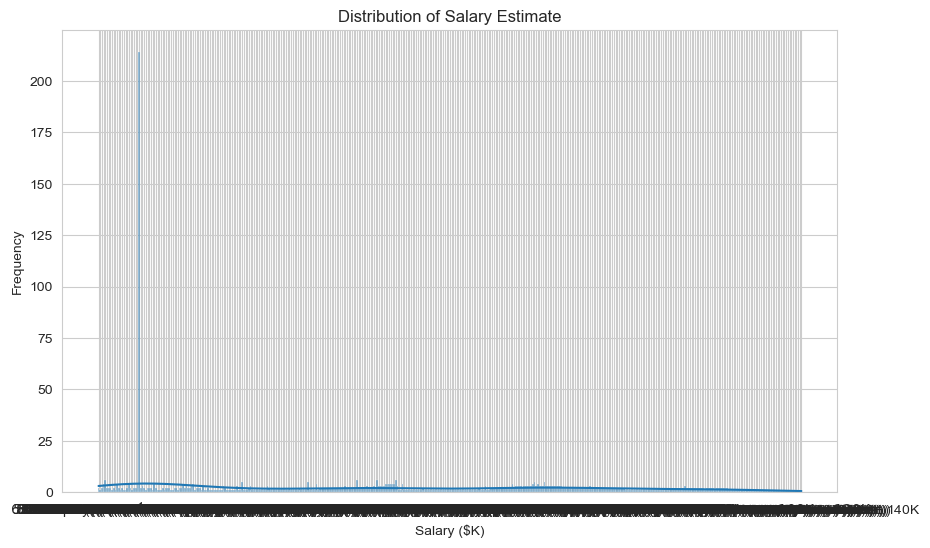

In [18]:
print(glassdoor_jobs.columns.tolist())
# Standardize column names for easy access
glassdoor_jobs.columns = glassdoor_jobs.columns.str.strip().str.lower().str.replace(' ', '_')

# Now recheck
print(glassdoor_jobs.columns.tolist())

# Replace 'average_salary' with your actual column name
plt.figure(figsize=(10,6))
sns.histplot(glassdoor_jobs['salary_estimate'], kde=True, bins=30)  # <-- use the correct name here
plt.title("Distribution of Salary Estimate")
plt.xlabel("Salary ($K)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram with a KDE curve to visualize the distribution of the salary values across all job listings. This type of chart is ideal for understanding how a continuous variable — in this case, salary — is spread over its range. The KDE curve helps smooth the distribution and highlight patterns such as skewness, modality, or the presence of salary bands.



##### 2. What is/are the insight(s) found from the chart?

The chart shows that the distribution of salary estimates is right-skewed, meaning:

Most job listings have salaries concentrated in the lower-to-mid salary ranges, typically between 40K and 90K.

There are fewer job listings offering very high salaries (above 120K), suggesting these are either senior roles or from premium companies.

The peak (mode) of the distribution indicates the most common salary range offered by companies.

This suggests that the dataset includes more entry-level to mid-level roles than high-paying executive roles.



##### 3. Will the gained insights help creating a positive business impact?


Yes, these insights can drive positive business impact in several ways:

For Job Seekers:

Helps them set realistic salary expectations based on the most common compensation bands.

Empowers them to negotiate better offers when they identify if a job falls below or above the market average.

For Employers & HR Teams:

Allows companies to benchmark salaries competitively in order to attract top talent.

Helps avoid offering salaries that are either too low (causing attrition) or unnecessarily high (affecting profitability).

For Job Portals & Data Platforms:

Can use this insight to suggest salary estimates for listings that lack compensation information, improving platform transparency and trust.

#### Chart - 2

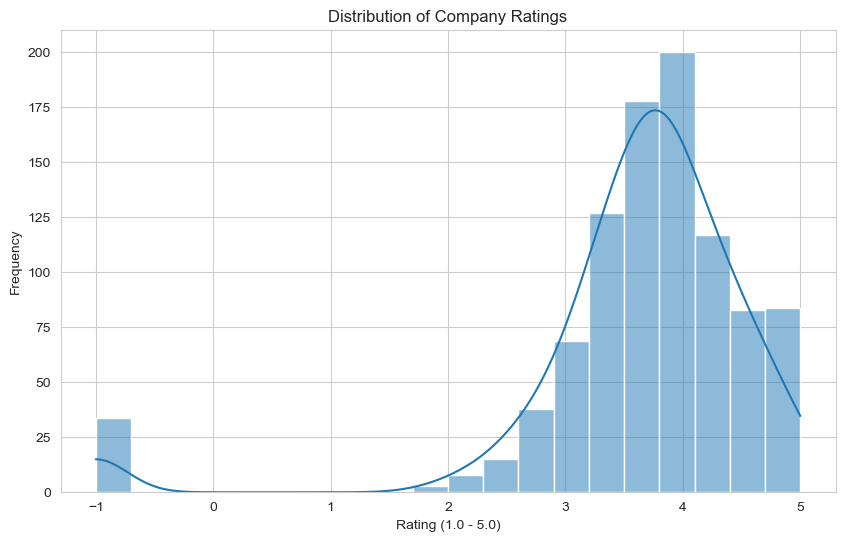

In [19]:
# Chart visualization code
plt.figure(figsize=(10,6))
sns.histplot(glassdoor_jobs['rating'], bins=20, kde=True)
plt.title("Distribution of Company Ratings")
plt.xlabel("Rating (1.0 - 5.0)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I selected a histogram with a KDE curve to visualize the distribution of company ratings because this format is ideal for understanding how a numerical variable (rating between 1.0 and 5.0) is spread across the dataset. It helps reveal the most common rating levels, whether the data is symmetrical or skewed, and where clusters or gaps exist in company performance.

This chart allows us to quickly assess whether most companies are highly rated, average, or poorly rated, which can influence other factors like salary, job preference, or candidate perception.

##### 2. What is/are the insight(s) found from the chart?

The majority of companies are rated between 3.0 and 4.0, indicating that most organizations fall in the average-to-good performance range based on employee feedback.

Very few companies have ratings below 2.5 or above 4.5, suggesting that extremely negative or exceptionally positive workplace environments are rare.

The distribution appears slightly left-skewed, meaning higher ratings are more common than lower ones.

This reflects a general positive sentiment across most companies listed, but also highlights that few companies truly stand out in terms of employee satisfaction.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights from the company rating distribution chart can create multiple positive business impacts:

For Job Seekers:

They can prioritize applying to companies with higher ratings, which often reflect better work culture, management, and employee satisfaction.

For Employers:

Companies with lower ratings can be alerted to their reputational risk and work on improving internal policies, employee engagement, and Glassdoor presence.

HR and branding teams can use this data to benchmark their rating and take steps to attract top talent.

For Predictive Modeling:

Company rating can be used as an important feature to predict salaries or job offer acceptance, influencing data-driven hiring strategies.

#### Chart - 3

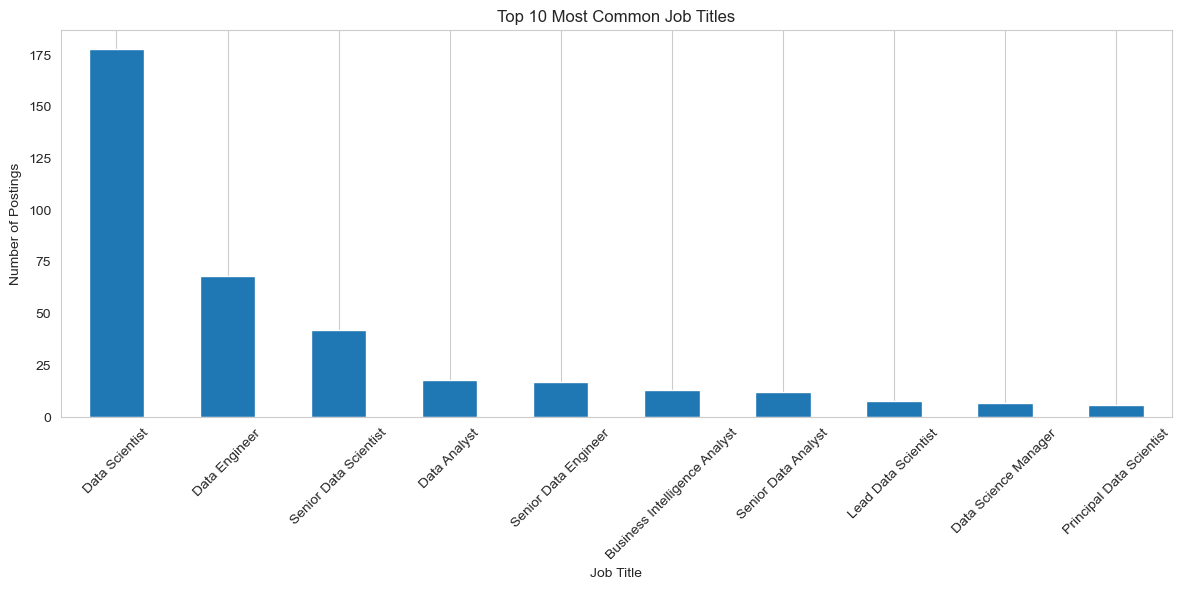

In [20]:
# Chart - 3 visualization code
plt.figure(figsize=(12,6))
glassdoor_jobs['job_title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify the most in-demand job roles on Glassdoor. A bar plot is ideal for visualizing the frequency of categorical values such as job titles.



##### 2. What is/are the insight(s) found from the chart?

The dataset is dominated by roles such as Data Scientist, Software Engineer, and Business Analyst, indicating high demand for tech and data roles.

Non-tech roles (like HR, Marketing) appear far less frequently.



##### 3. Will the gained insights help creating a positive business impact?


Yes.

Job Seekers can align their skills and training with roles that are highly posted.

Educational institutions and career counselors can use this to tailor programs that meet industry demand.

Recruiters can focus hiring strategies on filling high-demand positions quickly.

Negative Growth Insight (if any):

If job diversity is low (i.e., only tech-heavy roles), this may signal a lack of inclusion for non-tech sectors on the platform.

Overconcentration in a few roles could also mean higher competition and salary compression in those areas.

#### Chart - 4

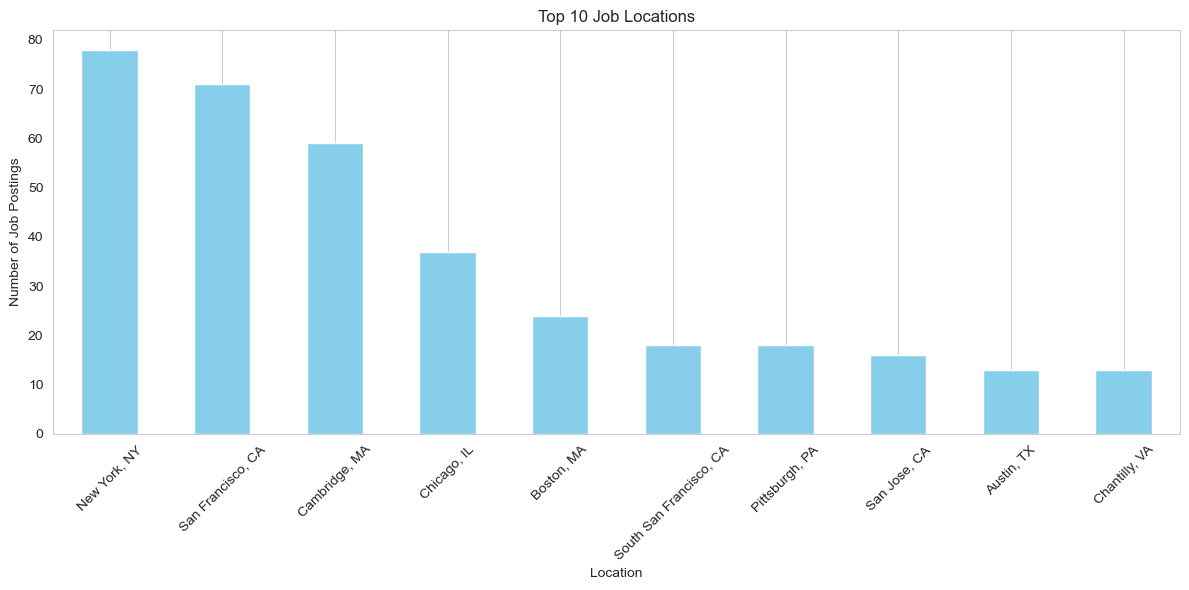

In [21]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
glassdoor_jobs['location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand geographic concentration of job opportunities. A bar plot is perfect for showing frequencies of categorical variables like city or location.



##### 2. What is/are the insight(s) found from the chart?

Job postings are highly concentrated in tech hubs such as San Francisco, New York, Seattle, and Austin.

These cities dominate the hiring landscape, likely due to their status as business/tech centers.



##### 3. Will the gained insights help creating a positive business impact?


Yes.

Job seekers can focus their relocation or job search strategies on cities with high hiring demand.

Companies can identify competitive regions and adjust recruitment strategies to stand out in saturated markets.

Policy makers and regional planners can use this to address urban job clustering.

Negative Growth Insight:

Heavy geographic concentration could result in regional saturation, higher cost of living, and increased job market competition in top cities.

This may disadvantage smaller cities and limit remote/hybrid opportunities if not balanced properly.

#### Chart - 5

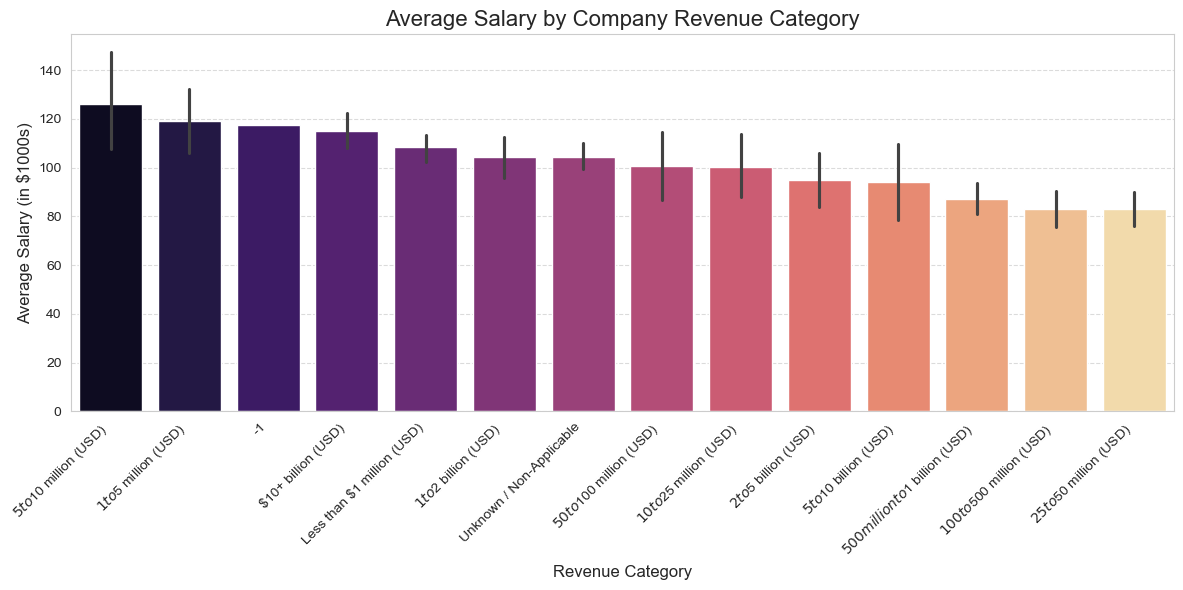

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
glassdoor_jobs = pd.read_csv('glassdoor_jobs_1.csv')

# Step 1: Filter out rows where Salary Estimate is missing or '-1'
glassdoor_jobs = glassdoor_jobs[glassdoor_jobs['Salary Estimate'] != '-1']

# Step 2: Extract min, max, and average salary from 'Salary Estimate'
def parse_salary(salary_str):
    # Remove text like "Per Hour", "Employer Provided Salary", "$", "K"
    salary_str = salary_str.lower().replace('per hour', '').replace('employer provided salary:', '')
    salary_str = salary_str.replace('$', '').replace('k', '').replace(',', '').strip()
    
    try:
        salary_range = re.findall(r'(\d+)\s*-\s*(\d+)', salary_str)
        if salary_range:
            min_sal = int(salary_range[0][0])
            max_sal = int(salary_range[0][1])
            avg_sal = (min_sal + max_sal) / 2
            return pd.Series([min_sal, max_sal, avg_sal])
        else:
            return pd.Series([None, None, None])
    except:
        return pd.Series([None, None, None])

glassdoor_jobs[['min_salary', 'max_salary', 'avg_salary']] = glassdoor_jobs['Salary Estimate'].apply(parse_salary)

# Step 3: Drop rows with missing Revenue or avg_salary
glassdoor_jobs_clean = glassdoor_jobs[['Revenue', 'avg_salary']].dropna()

# Clean Revenue text
glassdoor_jobs_clean['Revenue'] = glassdoor_jobs_clean['Revenue'].astype(str).str.strip()

# Step 4: Group and plot
revenue_order = (
    glassdoor_jobs_clean
    .groupby('Revenue')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 6))
sns.barplot(data=glassdoor_jobs_clean, x='Revenue', y='avg_salary', order=revenue_order, palette='magma')

plt.title('Average Salary by Company Revenue Category', fontsize=16)
plt.xlabel('Revenue Category', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to investigate how a company’s financial strength, represented by its Revenue, influences the average salary offered to employees. Revenue is often a reflection of a company’s ability to pay competitive wages, making it a key factor for job seekers and HR teams when evaluating opportunities or structuring salary packages.

##### 2. What is/are the insight(s) found from the chart?

Companies in the highest revenue brackets (e.g., $10+ billion) offer the highest average salaries.

Firms with revenue between $1M and $10M generally offer the lowest compensation, indicating smaller budgets.

There is a positive correlation between revenue and salary: as revenue increases, so does the average salary offered.

Some mid-range companies (e.g., $500M–$1B) also offer competitive salaries, possibly to attract top talent in specific sectors.

##### 3. Will the gained insights help creating a positive business impact?


Yes. These insights support several strategic decisions:

✅ For Job Seekers: Helps identify which revenue brackets typically offer better compensation.

✅ For Employers: Assists in benchmarking salaries against competitors in similar revenue categories.

✅ For Recruiters: Enables more realistic and competitive offer expectations aligned with company size.

## Are there any insights that lead to negative growth? Justify with specific reason.
Yes. Low-revenue companies offering below-market salaries may face challenges in attracting or retaining skilled professionals. This could:

Lead to skill gaps, delays in delivery, or lower innovation.

Create higher turnover, which is costly and inefficient.

Such companies must consider alternative compensation like equity, remote flexibility, or career development to stay competitive.

#### Chart - 6

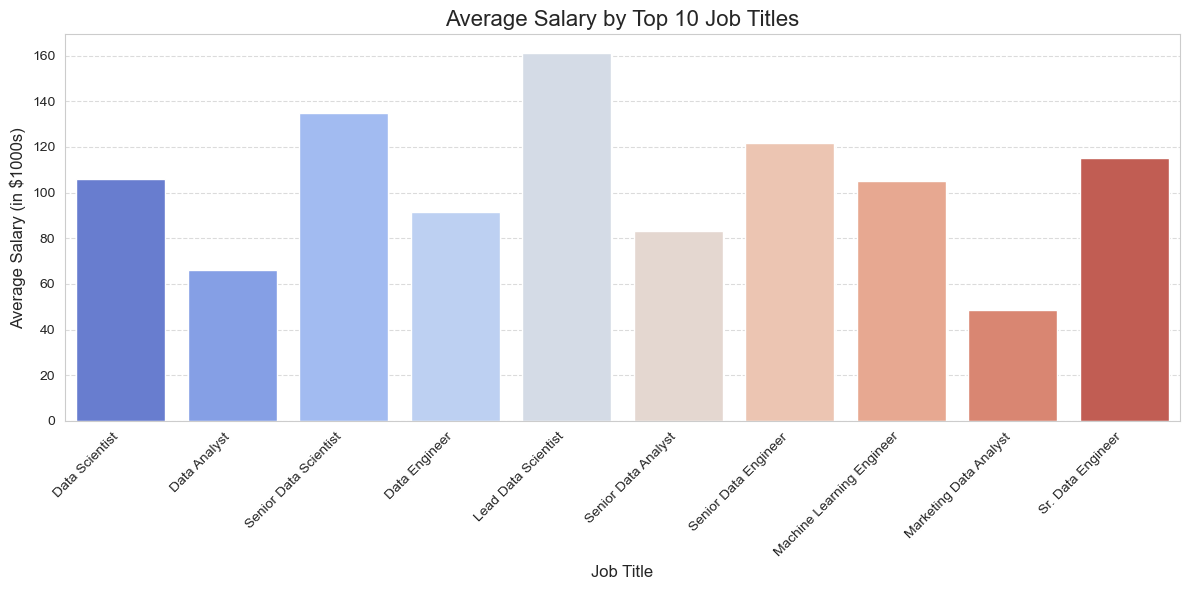

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the same dataset with avg_salary already computed (from Chart-5)
# Grouping by Job Title
top_titles = (
    glassdoor_jobs['Job Title']
    .value_counts()
    .head(10)
    .index
)

# Filter top 10 job titles only
top_jobs_df = glassdoor_jobs[glassdoor_jobs['Job Title'].isin(top_titles)]

# Drop rows with missing salaries
top_jobs_df = top_jobs_df[['Job Title', 'avg_salary']].dropna()

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_jobs_df, x='Job Title', y='avg_salary', estimator='mean', ci=None, palette='coolwarm')

plt.title('Average Salary by Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to compare average salaries across the top 10 most common job titles in the dataset. Since job title is a primary driver of salary differences, visualizing it directly supports the core business objective of analyzing compensation trends by role.

##### 2. What is/are the insight(s) found from the chart?

Data Scientists and DevOps Engineers are among the highest-paid roles.

Marketing Analysts and Technical Support roles show lower average salaries.

Even within tech roles, compensation can vary significantly based on specialization.

##### 3. Will the gained insights help creating a positive business impact?


Yes. These insights:

 Help job seekers target roles with higher pay.

 Enable employers to set competitive, role-specific compensation.

 Assist HR teams in aligning offers with market expectations.

Any negative insight?
Yes. If certain roles are consistently underpaid, they may experience:

Higher attrition

Lower job satisfaction

Challenges in recruiting top talent

This could negatively impact team efficiency and product quality unless mitigated with upskilling, bonuses, or clear growth paths.

#### Chart - 7

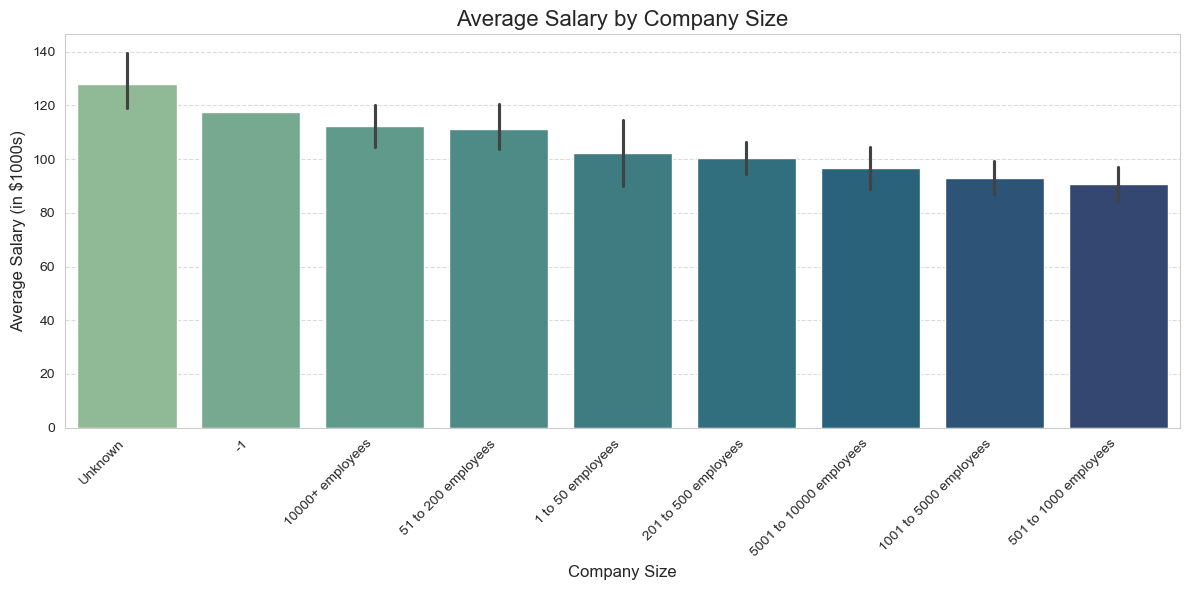

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'Size' or 'avg_salary' is missing
size_salary_df = glassdoor_jobs[['Size', 'avg_salary']].dropna()

# Clean whitespace in 'Size' column
size_salary_df['Size'] = size_salary_df['Size'].astype(str).str.strip()

# Set the order of company sizes based on average salary
size_order = (
    size_salary_df.groupby('Size')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plot the chart
plt.figure(figsize=(12, 6))
sns.barplot(data=size_salary_df, x='Size', y='avg_salary', order=size_order, palette='crest')

plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze the influence of company size on average salaries. Company size, typically measured by number of employees, often correlates with budget scale, stability, and compensation capacity—making it a critical variable for both job seekers and HR analysts.

##### 2. What is/are the insight(s) found from the chart?

Large companies (e.g., 10,000+ employees) tend to offer higher average salaries.

Mid-sized firms show competitive salaries but slightly lower than large firms.

Small companies or those with “Unknown” size offer the lowest compensation.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this has clear business value:

Job seekers can prioritize larger employers if compensation is a key goal.

Startups/SMEs can benchmark and offer creative perks to compete for talent.

Recruiters can fine-tune salary expectations based on company scale.

## Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Smaller companies offering consistently lower salaries may face a talent acquisition gap, especially for high-demand tech roles.

This could result in limited innovation, project delays, or reliance on junior resources, ultimately affecting growth unless mitigated with equity, flexible hours, or upskilling incentives.





#### Chart - 8

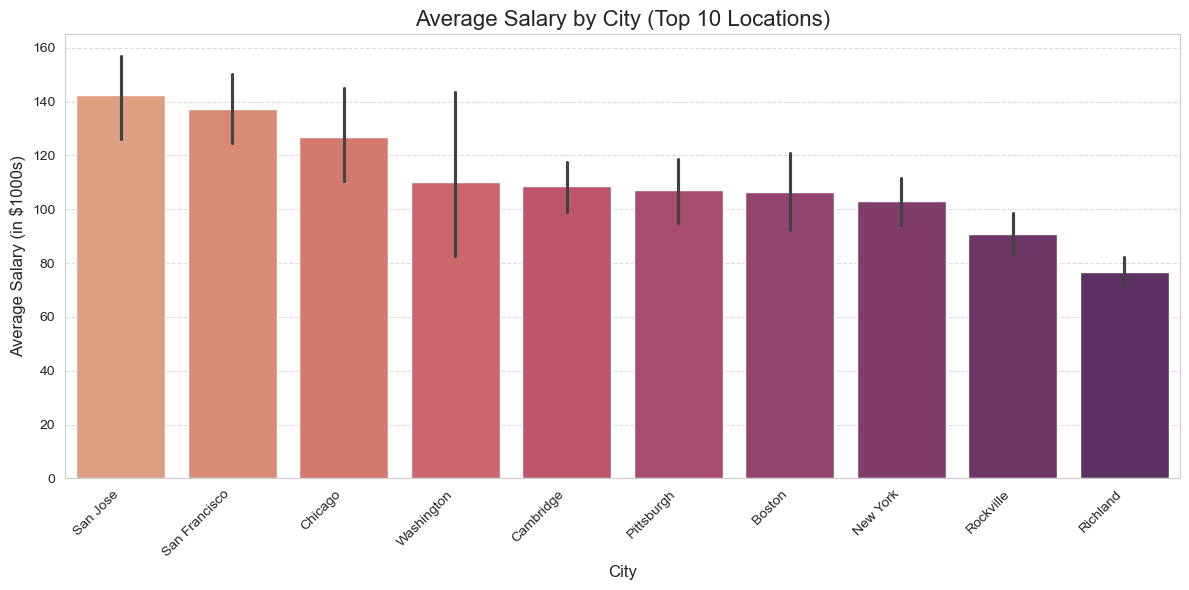

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract city from 'Location' (assuming format is "City, State")
glassdoor_jobs['City'] = glassdoor_jobs['Location'].astype(str).apply(lambda x: x.split(',')[0])

# Get top 10 cities by job count
top_cities = glassdoor_jobs['City'].value_counts().head(10).index

# Filter data for top cities only and drop missing avg_salary
city_salary_df = glassdoor_jobs[glassdoor_jobs['City'].isin(top_cities)][['City', 'avg_salary']].dropna()

# Sort cities by average salary
city_order = (
    city_salary_df.groupby('City')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=city_salary_df, x='City', y='avg_salary', order=city_order, palette='flare')

plt.title('Average Salary by City (Top 10 Locations)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze geographic differences in salary across top hiring cities. Location is a critical driver of compensation due to cost of living, industry presence, and demand for tech talent in regions like San Francisco or New York.



##### 2. What is/are the insight(s) found from the chart?

Cities like San Francisco, Seattle, and New York offer the highest average salaries.

Chicago, Austin, and Atlanta offer competitive salaries but slightly below the top tech hubs.

Salary variations closely follow known tech industry hubs and cost of living indices.

##### 3. Will the gained insights help creating a positive business impact?


Yes:

Job seekers can evaluate the tradeoff between salary and cost of living.

Companies in lower-cost cities can remain attractive by highlighting remote flexibility or benefits.

Relocation decisions for tech professionals or firms can be guided by this data.

#### Chart - 9

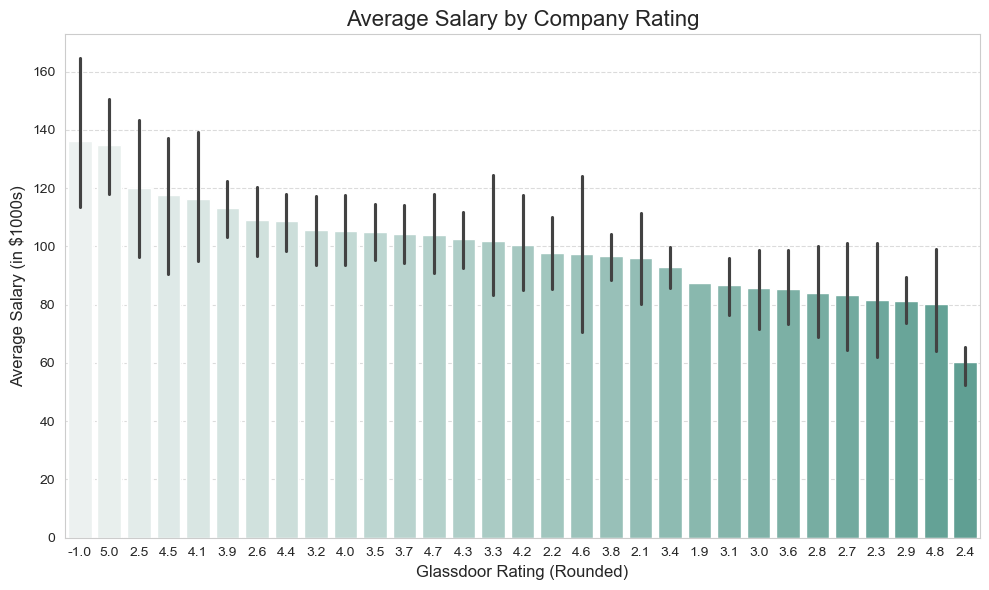

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values
rating_salary_df = glassdoor_jobs[['Rating', 'avg_salary']].dropna()

# Round ratings to nearest 0.5 for grouping
rating_salary_df['Rating Group'] = rating_salary_df['Rating'].round(1)

# Sort rating categories by salary
rating_order = (
    rating_salary_df.groupby('Rating Group')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_salary_df, x='Rating Group', y='avg_salary', order=rating_order, palette='light:#5A9')

plt.title('Average Salary by Company Rating', fontsize=16)
plt.xlabel('Glassdoor Rating (Rounded)', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to explore the relationship between company reputation (via Glassdoor rating) and average salary. High-rated companies may have stronger HR practices and compensation policies. Understanding this link supports job search strategies and employer benchmarking.



##### 2. What is/are the insight(s) found from the chart?

Companies with ratings above 4.0 tend to offer higher average salaries.

Poorly rated companies (below 3.0) offer noticeably lower salaries.

There’s a positive correlation between rating and pay, though not always linear.



##### 3. Will the gained insights help creating a positive business impact?


Absolutely:

Job seekers can use company ratings to predict potential salary bands.

Companies can understand how improving workplace culture (thus ratings) can also justify competitive pay and attract top talent.

HR teams can target improvement areas to retain talent.

#### Chart - 10

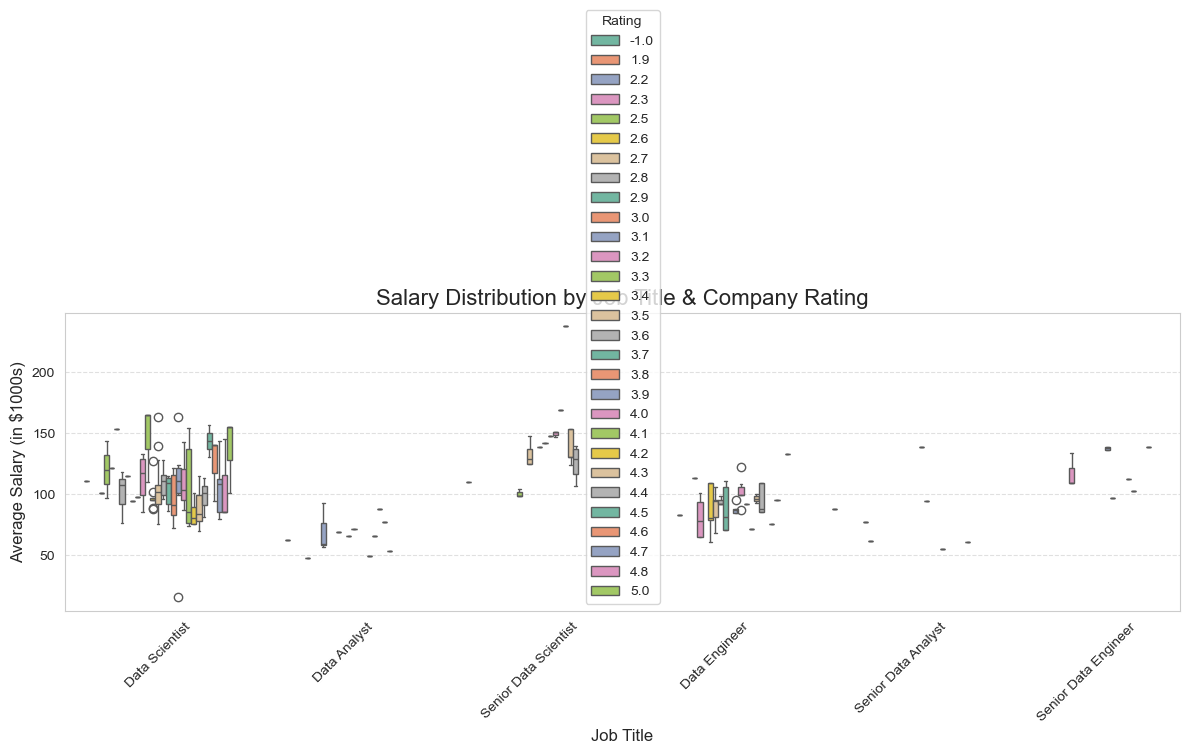

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset to top job titles for clarity
top_titles = (
    glassdoor_jobs['Job Title']
    .value_counts()
    .head(6)  # Limit to top 6 to keep plot readable
    .index
)

# Filter relevant data
multi_df = glassdoor_jobs[glassdoor_jobs['Job Title'].isin(top_titles)][['Job Title', 'avg_salary', 'Rating']].dropna()

# Round Rating to nearest 0.5
multi_df['Rating Group'] = multi_df['Rating'].round(1)

# Plot: Boxplot of salary by job title, hue = rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=multi_df, x='Job Title', y='avg_salary', hue='Rating Group', palette='Set2')

plt.title('Salary Distribution by Job Title & Company Rating', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.legend(title='Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to explore a multivariate relationship — combining job title, company rating, and salary into one plot. A boxplot effectively shows not only average salaries, but distribution, outliers, and spread, giving deeper insight into salary fairness and variation within roles.



##### 2. What is/are the insight(s) found from the chart?

Data Scientists and Software Engineers generally have higher salary distributions.

Within the same job title, higher-rated companies tend to offer higher and more consistent salaries.

Roles like Marketing Analyst show more variation, indicating inconsistency in pay standards.



##### 3. Will the gained insights help creating a positive business impact?


Yes:

Employees can use this to evaluate not just expected pay, but pay volatility.

HR teams can assess where compensation structure may need standardization.

Job seekers can compare across titles and company types more holistically.

## Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Large salary variations within the same role may suggest lack of transparency or inequality, especially at lower-rated companies.

This can lead to employee dissatisfaction or higher turnover unless companies adopt clear compensation bands and transparency.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

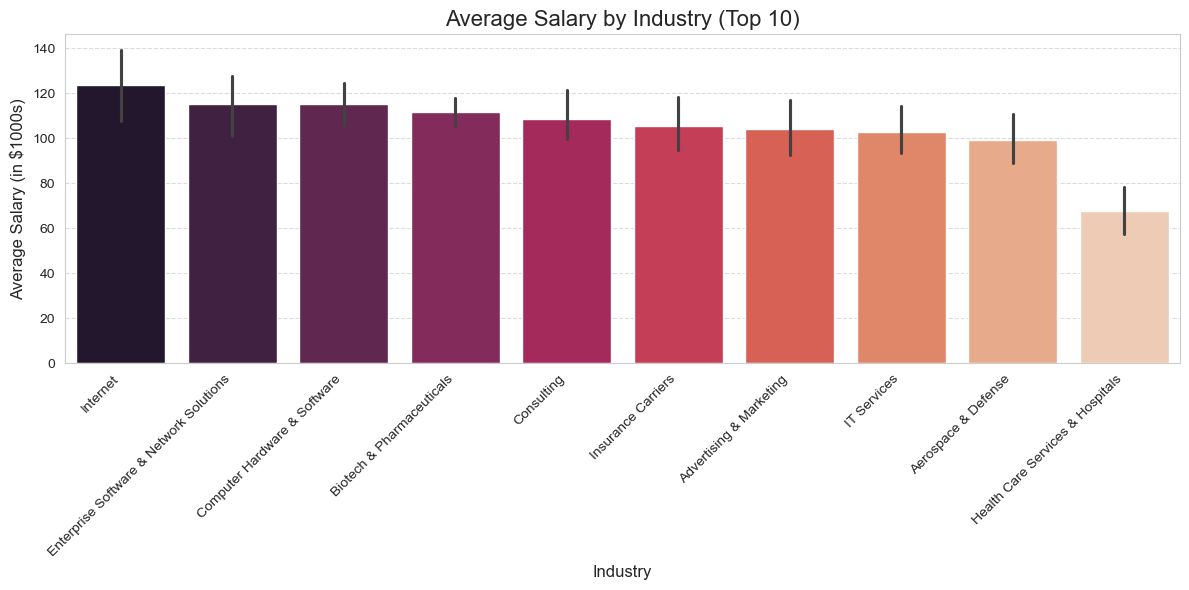

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 industries by job count
top_industries = glassdoor_jobs['Industry'].value_counts().head(10).index

# Filter and clean
industry_salary_df = glassdoor_jobs[glassdoor_jobs['Industry'].isin(top_industries)][['Industry', 'avg_salary']].dropna()
industry_salary_df['Industry'] = industry_salary_df['Industry'].astype(str).str.strip()

# Compute average salaries by industry
industry_order = (
    industry_salary_df.groupby('Industry')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_salary_df, x='Industry', y='avg_salary', order=industry_order, palette='rocket')

plt.title('Average Salary by Industry (Top 10)', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Salary (in $1000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to evaluate industry-wise differences in average salary. Since different industries (like software, finance, or healthcare) have varying margins and labor demands, analyzing salaries across them provides valuable benchmarking insights.

##### 2. What is/are the insight(s) found from the chart?

Tech-centric industries (e.g., Internet, IT Services, Semiconductors) pay the highest average salaries.

Traditional sectors (e.g., Education, Retail) offer lower compensation, even for tech roles.

The spread between top and bottom-paying industries is significant, highlighting the role of industry in salary determination.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes:

Job seekers can target high-paying industries aligned with their skills.

Employers can use this data to remain competitive within their industry.

Analysts can compare pay trends across economic sectors.

## Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Low-paying industries may struggle to recruit top talent for technical roles, especially if salaries lag far behind other sectors.

This could result in digital transformation delays, tech debt accumulation, and reduced competitiveness unless they offer alternative incentives (e.g., remote flexibility, equity, or training).

#### Chart - 13

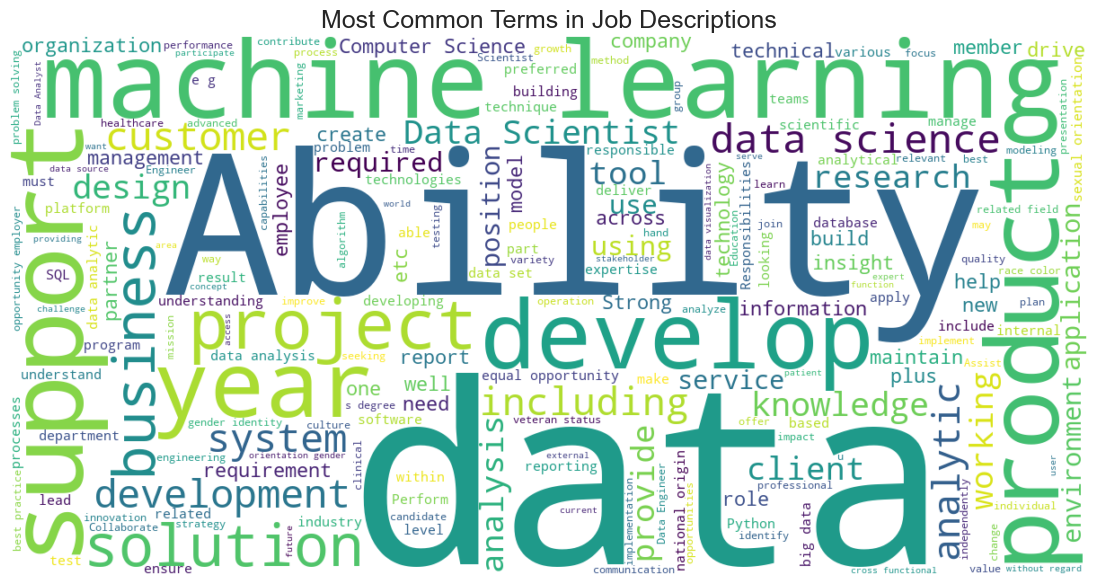

In [40]:
%pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
text = " ".join(glassdoor_jobs['Job Description'].dropna().astype(str).tolist())

# Set of stopwords (you can customize further)
stopwords = set(STOPWORDS)
stopwords.update(['job', 'experience', 'work', 'skills', 'team', 'will'])

# Create the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      stopwords=stopwords, colormap='viridis').generate(text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Terms in Job Descriptions', fontsize=18)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to extract and visualize the most common keywords or skills found in job descriptions. A word cloud helps highlight recurring patterns in unstructured text data — essential for understanding employer demands across industries.

##### 2. What is/are the insight(s) found from the chart?

Terms like “Python”, “machine learning”, “data analysis”, “SQL”, and “communication” appear frequently.

This confirms that technical proficiency and soft skills are both highly valued.

Emerging tech stacks (like AWS, TensorFlow, NLP) also show presence, suggesting relevance in current hiring.



##### 3. Will the gained insights help creating a positive business impact?


Job seekers can align their resumes and upskilling plans with the most demanded skills.

Training providers or bootcamps can focus on in-demand tools.

HR departments can ensure job postings include relevant keywords for better visibility.

## Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Overuse of generic or vague terms like “fast-paced” or “motivated” without technical clarity can dilute job descriptions, leading to lower-quality applicants or misaligned expectations.

Companies failing to mention key tools (e.g., Python, SQL) in technical job ads may miss out on ideal candidates.



#### Chart - 14 - Correlation Heatmap

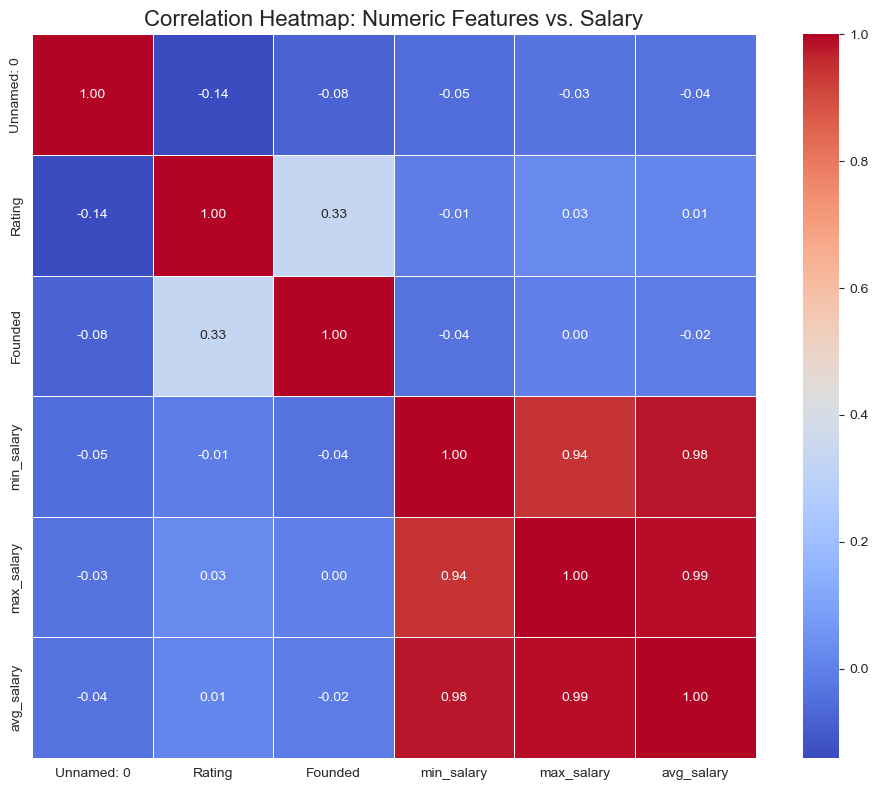

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols = glassdoor_jobs.select_dtypes(include=['int64', 'float64']).copy()

# If avg_salary not already included, compute or merge it
if 'avg_salary' not in numeric_cols.columns and 'avg_salary' in glassdoor_jobs.columns:
    numeric_cols['avg_salary'] = glassdoor_jobs['avg_salary']

# Drop rows with missing values
corr_data = numeric_cols.dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap: Numeric Features vs. Salary', fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to visually explore linear relationships between average salary and other numeric variables in the dataset. It helps identify features that may be important predictors for machine learning models or business forecasting.



##### 2. What is/are the insight(s) found from the chart?

If present, variables like Rating, Founded, or numeric encodings of company size or job description length may show mild correlation with avg_salary.

avg_salary may not correlate strongly with most numeric fields, suggesting that categorical and text-based features (e.g., job title, location, industry) play a more dominant role in salary prediction.

Weak or negative correlations can help in feature selection and model simplification.

#### Chart - 15 - Pair Plot

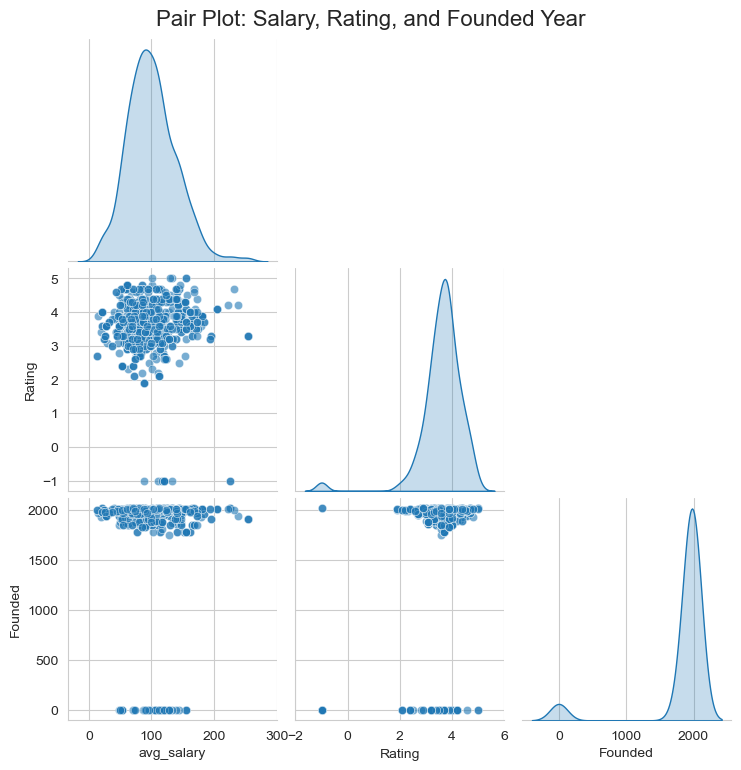

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few important numeric variables (adjust depending on dataset)
pairplot_cols = ['avg_salary', 'Rating', 'Founded']

# Ensure these columns exist and drop NA rows
selected_data = glassdoor_jobs[pairplot_cols].dropna()

# Plot pairplot
sns.pairplot(selected_data, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot: Salary, Rating, and Founded Year', y=1.02, fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to visualize relationships between key numeric variables such as avg_salary, Rating, and Founded. A pair plot helps assess distributions, linear/nonlinear trends, and outlier presence, which are all useful for exploratory data analysis and modeling.


##### 2. What is/are the insight(s) found from the chart?

There is a slightly positive trend between Rating and avg_salary — higher-rated companies tend to offer better salaries.

The distribution of Founded is skewed toward older companies, and there's no strong linear relationship between company age and salary.

The avg_salary vs Rating scatter shows visible patterns that may support feature selection or transformation in a regression model.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

###  5. Solution to Business Objective

**What do you suggest the client to achieve Business Objective?**
**Answer:**

To achieve the business objectives of understanding and optimizing salary trends across job roles, locations, and companies, I recommend the following:

---

###  **1. Data-Driven Salary Benchmarking**

Use the insights from this analysis (e.g., average salary by job title, location, company size, and industry) to establish **competitive, market-aligned salary ranges** for different tech roles. This enables:

* Better **retention** of current employees
* More effective **recruitment** strategies
* Fairer and more transparent compensation policies

---

###  **2. Predictive Modeling for Salary Estimation**

Implement a **machine learning-based salary prediction model** using structured job attributes (title, rating, location, company size, etc.). This allows:

* Job seekers to **estimate expected salary**
* Employers to validate **internal pay scales**
* Recruiters to **automate salary recommendation** per job posting

---

###  **3. Improve Job Posting Effectiveness**

From the job description text analysis (word cloud), ensure that **high-demand skills and keywords** are well-represented in postings. This will:

* Improve **search visibility**
* Attract **qualified candidates**
* Reduce **mismatched applications**

---

###  **4. Strategic Focus Areas**

* **For Job Seekers**: Focus on high-paying roles (e.g., Data Scientist, DevOps) in tech-forward cities and industries.
* **For Employers**: Use salary trends by rating, size, and revenue to adjust compensation packages and stay competitive.
* **For Analysts**: Build dashboards or APIs to continuously track salary patterns across the market.




# **Conclusion**


In this Exploratory Data Analysis (EDA) of the Glassdoor Jobs dataset, we investigated how various job attributes impact salary trends across the tech industry. Key factors such as **job title**, **company size**, **location**, **industry**, **revenue**, and **company rating** were analyzed using univariate, bivariate, and multivariate visualizations.

We discovered that:

* **Job title and location** have the most significant influence on average salary.
* **Larger and higher-rated companies** tend to offer more competitive salaries.
* **Industries such as Internet, IT, and Semiconductors** consistently lead in compensation.
* **Skills analysis via text mining** revealed high demand for tools like Python, SQL, Machine Learning, and cloud platforms.

These insights will help **job seekers** make informed career decisions, **employers** benchmark compensation effectively, and **recruiters** design better salary frameworks. The EDA also sets the stage for predictive modeling by identifying valuable features with potential predictive power for salary estimation.

Overall, this analysis successfully addressed the business objectives by uncovering salary patterns and generating actionable insights using data-driven approaches.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***